In [76]:
import io
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [13, 13]
sys.path.append("..")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read cities from CSV

In [11]:
# get data from CSV
cities_path = "../datasets/cities-data.csv"
names = ["id", "x", "y"]
data = pd.read_csv(cities_path, names=names, sep=',', header=None, skiprows=1)

print("Cities shape:", data.shape)
data.head()

Cities shape: (500, 3)


,id,x,y
0,0,962.0,482.0
1,1,236.0,623.0
2,2,447.0,511.0
3,3,754.0,54.0
4,4,397.0,210.0


In [43]:
import src.utils as utils

# get list of cities
x = data.iloc[:, 1]
y = data.iloc[:, 2]
cities = utils.get_cities_from_lists(x, y)
order = list(range(0, len(cities)))

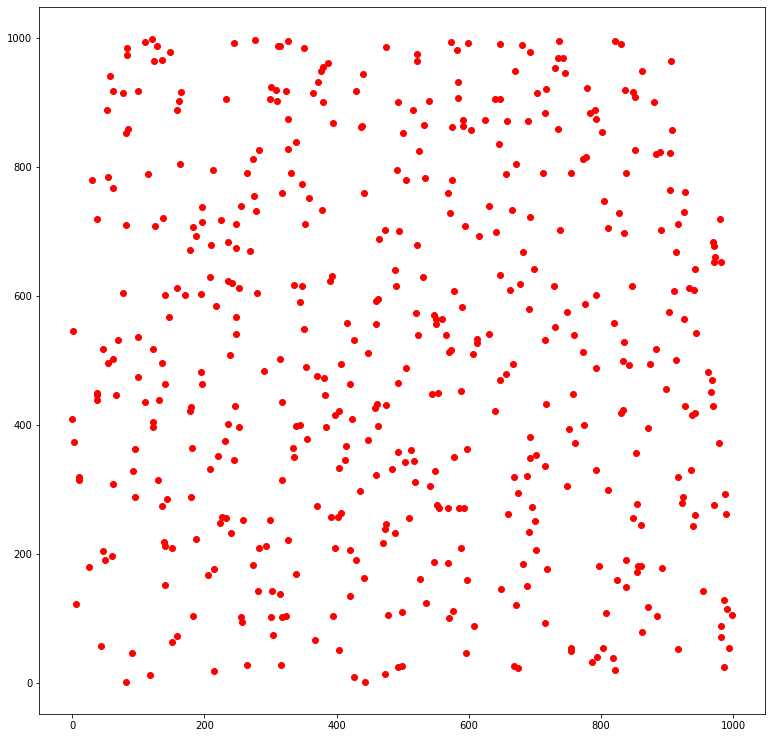

In [44]:
# plot cities
x = utils.get_x_list(cities, order)
y = utils.get_y_list(cities, order)
plt.plot(x, y, 'ro')
plt.show()

# Genrate random cities on a circle for tests

In [354]:
from src.city import City
from src.generate_data import generate_data
import src.genetic_algorithm as ga

In [447]:
# setup
MAP_SIZE = 1000
NUMB_OF_CITIES = 50
NUMB_OF_ITERATIONS = 1000
MUTATION_RATE = 0.1
POPULATION_SIZE = 500

best_distances = []

In [448]:
# generate test dataset
circle_cities = generate_data(NUMB_OF_CITIES, MAP_SIZE)
circle_order = list(range(0, len(circle_cities)))

# Plot cities

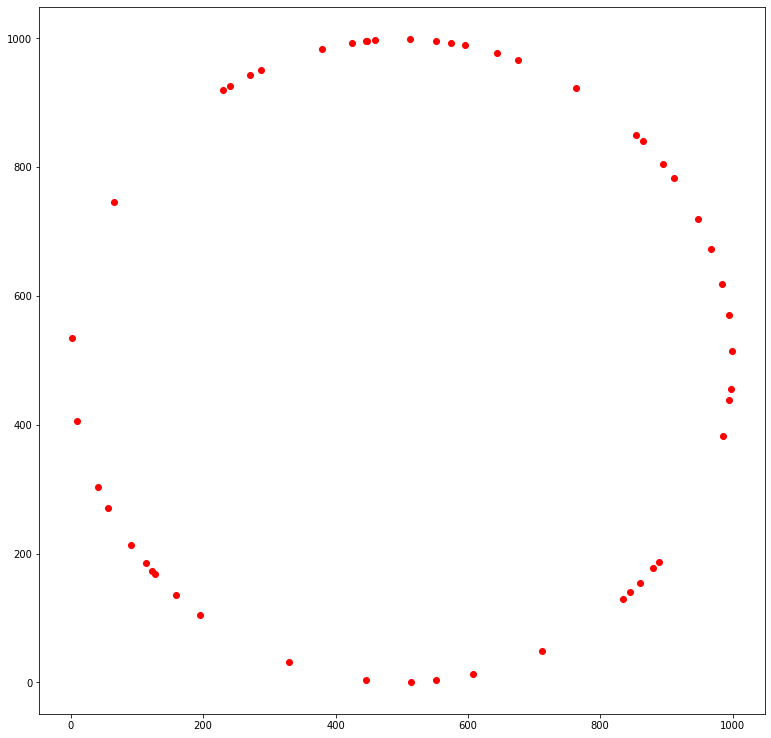

In [449]:
# plot circle cities
x = utils.get_x_list(circle_cities, circle_order)
y = utils.get_y_list(circle_cities, circle_order)

plt.plot(x, y, 'or')
plt.show()

# Create initial population, calculate fitness, show best order in initial population

In [450]:
# create initial population & calculate fitness
population = ga.get_initial_population(circle_cities, POPULATION_SIZE, circle_order)
fitness_scores, current_record = ga.calculate_fitness(circle_cities, population)

Shortest route:  23609.43021949047


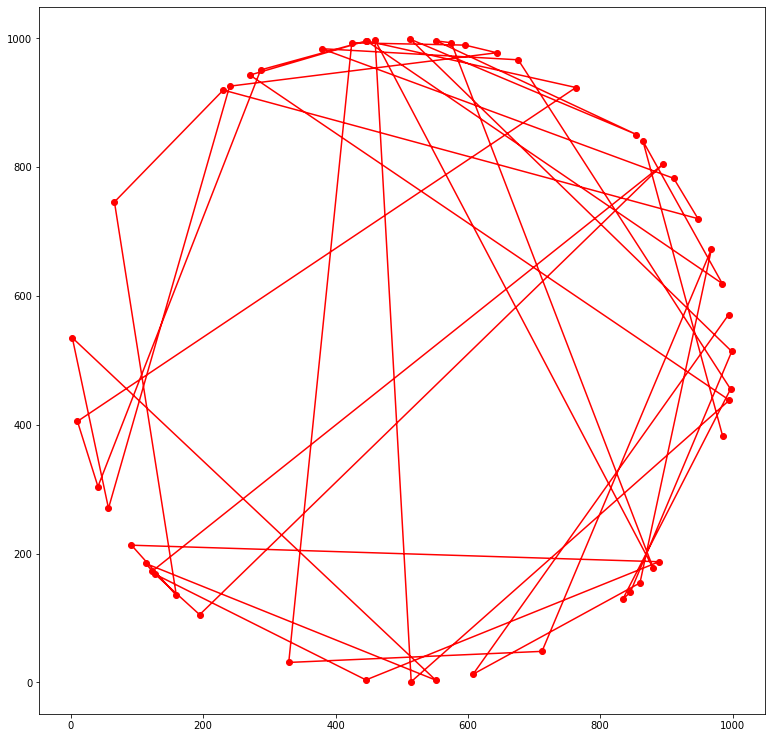

In [451]:
# show best score for initial population
best_distances.append(current_record)
print("Shortest route: ", current_record)

# plot best route
best_score_index = np.argmax(fitness_scores)
x = utils.get_x_list(circle_cities, population[best_score_index])
y = utils.get_y_list(circle_cities, population[best_score_index])
plt.plot(x, y, linestyle='-', marker='o', color='r')
plt.show()

# Run GA

In [452]:
#for n in range(len(population)):
#    print(population[n], " | f: ", 1/fitness_scores[n])
#print("initial-----")
    
for i in range(NUMB_OF_ITERATIONS):
    fitness_scores, current_record = ga.calculate_fitness(circle_cities, population)
    normalized_fitness_scores = ga.normalize_fitness(fitness_scores)
    population = ga.next_generation(circle_cities, population, normalized_fitness_scores)
    best_distances.append(current_record)
    #for n in range(len(population)):
        #print(population[n], " | f: ", 1/fitness_scores[n])
    #print("-----")

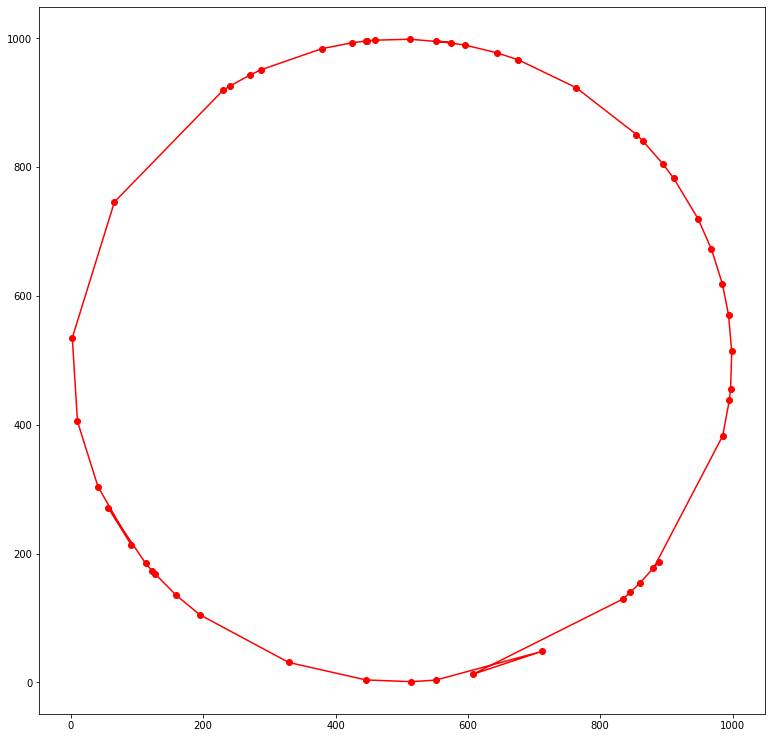

Shortest route:  2927.9617110823797


In [453]:
# plot best distance
best_score_index = np.argmax(fitness_scores)
x = utils.get_x_list(circle_cities, population[best_score_index])
y = utils.get_y_list(circle_cities, population[best_score_index])
plt.plot(x, y, linestyle='-', marker='o', color='r')
plt.show()

print("Shortest route: ", best_distances[-1])

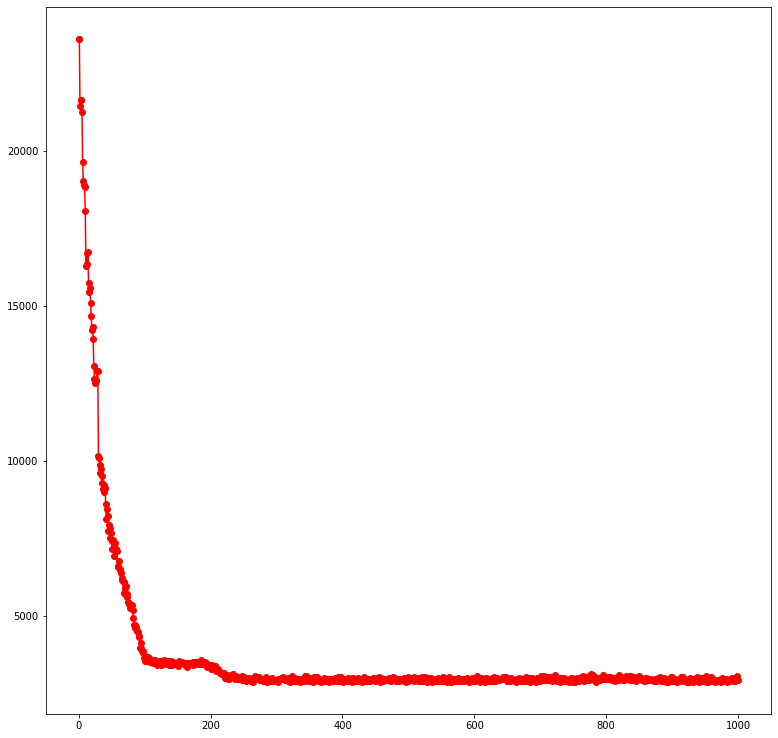

In [454]:
# plot distance graph
x = list(range(len(best_distances)))
y = best_distances
plt.plot(x, y, linestyle='-', marker='o', color='r')
plt.show()